Reading classics [Deep Learning Models](https://nbviewer.jupyter.org/github/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-basic.ipynb)

## Code Modules & Functions

In [1]:
import numpy as np,pandas as pd,pylab as pl
import h5py,torch
from torchvision.datasets import MNIST as tmnist
from torchvision import transforms
from torch.utils.data import DataLoader as tdl
from torch.utils.data import Dataset as tds
import torch.nn.functional as tnnf
from IPython.core.magic import register_line_magic
dev=torch.device("cuda:0" if torch.cuda.is_available() 
                 else "cpu")

In [2]:
class TData(tds):
    def __init__(self,X,y):   
        self.X=torch.tensor(X,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.int32)
    def __getitem__(self,index):
        train_img,train_lbl=self.X[index],self.y[index]
        return train_img,train_lbl
    def __len__(self):
        return self.y.shape[0]
def model_acc(model,data_loader):
    correct_preds,num_examples=0,0    
    for features,targets in data_loader:
        features=features.to(dev)
        targets=targets.to(dev)
        logits,probs=model(features)
        _,pred_labels=torch.max(probs,1)
        num_examples+=targets.size(0)
        correct_preds+=(pred_labels==targets).sum()        
    return correct_preds.float()/num_examples*100

In [3]:
@register_line_magic
def train_run(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets)
            optimizer.zero_grad(); cost.backward()
            optimizer.step()
            if not batch_ids%300:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train)//batch_size,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader)))
@register_line_magic
def print_acc(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader)))

In [4]:
@register_line_magic
def train_run2(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets)
            optimizer2.zero_grad(); cost.backward()
            optimizer2.step()
            if not batch_ids%300:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train)//batch_size,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader)))
@register_line_magic
def print_acc2(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader)))

In [5]:
@register_line_magic
def train_run3(epochs):
    epochs=int(epochs)
    for epoch in range(epochs):
        for batch_ids,(features,targets) in enumerate(train_loader2):        
            features=features.to(dev)
            targets=targets.to(dev)
            logits,probs=model(features)
            cost=tnnf.cross_entropy(logits,targets.long())
            optimizer3.zero_grad(); cost.backward()
            optimizer3.step()
            if not batch_ids%100:
                print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                       %(epoch+1,epochs,batch_ids, 
                         len(train2)//batch_size2,cost))           
        with torch.set_grad_enabled(False):
            print('Epoch: %03d/%03d train accuracy: %.2f%%'%\
                  (epoch+1,epochs,model_acc(model,train_loader2)))
@register_line_magic
def print_acc3(t):
    if t=='test':
        print('Test accuracy: %.4f%%'%\
        (model_acc(model,test_loader2)))
    if t=='train':
        print('Train accuracy: %.4f%%'%\
        (model_acc(model,train_loader2)))

## Data

In [6]:
random_seed=23; batch_size=128
train=tmnist(root='data',train=True,download=True,
            transform=transforms.ToTensor())
test=tmnist(root='data',train=False, 
            transform=transforms.ToTensor())
train_loader=tdl(dataset=train,shuffle=True, 
                 batch_size=batch_size)
test_loader=tdl(dataset=test,shuffle=False, 
                batch_size=batch_size)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/opt/conda/conda-bld/pytorch_1587428190859/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.



Image dimensions: torch.Size([128, 1, 28, 28])
Label dimensions: torch.Size([128])




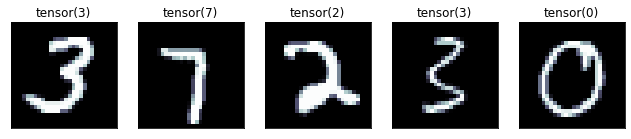

In [7]:
for images,labels in train_loader:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    n=np.random.randint(1,50)
    fig=pl.figure(figsize=(11,4))
    for i in range(n,n+5):
        ax=fig.add_subplot(1,5,i-n+1,\
        xticks=[],yticks=[],title=labels[i])
        ax.imshow((images[i]).reshape(28,28),
                  cmap=pl.cm.bone)
    break

['backgrounds', 'images', 'labels']


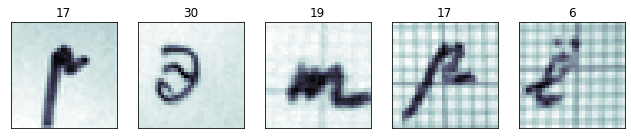

In [8]:
fpath='../input/classification-of-handwritten-letters/'
f='LetterColorImages_123.h5'
f=h5py.File(fpath+f,'r')
keys=list(f.keys()); print(keys)
x=np.array(f[keys[1]],dtype='float32')/255
x=(np.dot(x,[.299,.587,.114])).reshape(-1,1,32,32)
y=np.array(f[keys[2]],dtype='int32')-1
N=len(y); n=int(.2*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x_test,x_train=x[:n],x[n:]
y_test,y_train=y[:n],y[n:]
x_train.shape,y_train.shape
fig=pl.figure(figsize=(11,4))
n=np.random.randint(1,50)
for i in range(n,n+5):
    ax=fig.add_subplot(1,5,i-n+1,\
    xticks=[],yticks=[],title=y_test[i])
    ax.imshow((x_test[i].reshape(32,32)),
              cmap=pl.cm.bone)

In [9]:
random_seed=1; batch_size2=128
train2=TData(x_train,y_train)
test2=TData(x_test,y_test)
train_loader2=tdl(dataset=train2,batch_size=batch_size2,shuffle=True)
test_loader2=tdl(dataset=test2,batch_size=batch_size2,shuffle=False)
for images,labels in train_loader2:  
    print('Image dimensions: %s'%str(images.shape))
    print('Label dimensions: %s'%str(labels.shape))
    break

Image dimensions: torch.Size([128, 1, 32, 32])
Label dimensions: torch.Size([128])


## Simple CNN

In [10]:
class CNN(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN,self).__init__()
        # 28x28x1 => 28x28x8; (1*(28-1)-28+3)/2=1
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=8,
                kernel_size=(3,3),
                stride=(1,1),padding=1)
        # 28x28x8 => 14x14x8; (2*(14-1)-28+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 14x14x8 => 14x14x16; (1*(14-1)-14+3)/2=1
        self.conv2=torch.nn\
        .Conv2d(in_channels=8,out_channels=16,
                kernel_size=(3,3),
                stride=(1,1),padding=1)                
        # 14x14x16 => 7x7x16; (2*(7-1)-14+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(7*7*16,num_classes)
        for m in self.modules():
            if isinstance(m,torch.nn.Conv2d) or \
            isinstance(m,torch.nn.Linear):
                m.weight.data.normal_(0.,.01)
                m.bias.data.zero_()
                if m.bias is not None:
                    m.bias.detach().zero_()
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)        
        logits=self.linear1(y.view(-1,7*7*16))
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=10; learning_rate=.1
model=CNN(num_classes=num_classes)
model=model.to(dev)
optimizer=torch.optim\
.SGD(model.parameters(),lr=learning_rate)  

In [11]:
%train_run 30

Epoch: 001/030 | Batch 000/468 | Cost: 2.3026
Epoch: 001/030 | Batch 300/468 | Cost: 0.4951
Epoch: 001/030 train accuracy: 93.36%
Epoch: 002/030 | Batch 000/468 | Cost: 0.2389
Epoch: 002/030 | Batch 300/468 | Cost: 0.1085
Epoch: 002/030 train accuracy: 95.72%
Epoch: 003/030 | Batch 000/468 | Cost: 0.2622
Epoch: 003/030 | Batch 300/468 | Cost: 0.1142
Epoch: 003/030 train accuracy: 97.15%
Epoch: 004/030 | Batch 000/468 | Cost: 0.0790
Epoch: 004/030 | Batch 300/468 | Cost: 0.1078
Epoch: 004/030 train accuracy: 97.37%
Epoch: 005/030 | Batch 000/468 | Cost: 0.0575
Epoch: 005/030 | Batch 300/468 | Cost: 0.0748
Epoch: 005/030 train accuracy: 97.51%
Epoch: 006/030 | Batch 000/468 | Cost: 0.0904
Epoch: 006/030 | Batch 300/468 | Cost: 0.0396
Epoch: 006/030 train accuracy: 98.11%
Epoch: 007/030 | Batch 000/468 | Cost: 0.0438
Epoch: 007/030 | Batch 300/468 | Cost: 0.1245
Epoch: 007/030 train accuracy: 98.26%
Epoch: 008/030 | Batch 000/468 | Cost: 0.0602
Epoch: 008/030 | Batch 300/468 | Cost: 0.045

In [12]:
%print_acc train
%print_acc test

Train accuracy: 99.0567%
Test accuracy: 98.4800%


In [13]:
class CNN2(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN2,self).__init__()
        # 28x28x1 => 28x28x16; (1*(28-1)-28+5)/2=2
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=16,
                kernel_size=(5,5),
                stride=(1,1),padding=2)
        # 28x28x16 => 14x14x16; (2*(14-1)-28+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 14x14x16 => 14x14x256; (1*(14-1)-14+5)/2=2
        self.conv2=torch.nn\
        .Conv2d(in_channels=16,out_channels=256,
                kernel_size=(5,5),
                stride=(1,1),padding=2)                
        # 14x14x256 => 7x7x256; (2*(7-1)-14+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(7*7*256,256)
        self.linear2=torch.nn.Linear(256,num_classes)
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)
        y=y.view(-1,7*7*256)
        y=self.linear1(y)
        y=tnnf.relu(y)
        logits=self.linear2(y)
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=10; learning_rate=.05
model=CNN2(num_classes=num_classes)
model=model.to(dev)
optimizer2=torch.optim\
.SGD(model.parameters(),lr=learning_rate,momentum=.9) 

In [14]:
%train_run2 7

Epoch: 001/007 | Batch 000/468 | Cost: 2.3039
Epoch: 001/007 | Batch 300/468 | Cost: 0.1113
Epoch: 001/007 train accuracy: 98.73%
Epoch: 002/007 | Batch 000/468 | Cost: 0.0469
Epoch: 002/007 | Batch 300/468 | Cost: 0.0178
Epoch: 002/007 train accuracy: 99.38%
Epoch: 003/007 | Batch 000/468 | Cost: 0.0043
Epoch: 003/007 | Batch 300/468 | Cost: 0.0600
Epoch: 003/007 train accuracy: 99.60%
Epoch: 004/007 | Batch 000/468 | Cost: 0.0156
Epoch: 004/007 | Batch 300/468 | Cost: 0.0394
Epoch: 004/007 train accuracy: 99.66%
Epoch: 005/007 | Batch 000/468 | Cost: 0.0275
Epoch: 005/007 | Batch 300/468 | Cost: 0.0033
Epoch: 005/007 train accuracy: 99.64%
Epoch: 006/007 | Batch 000/468 | Cost: 0.0305
Epoch: 006/007 | Batch 300/468 | Cost: 0.0031
Epoch: 006/007 train accuracy: 99.78%
Epoch: 007/007 | Batch 000/468 | Cost: 0.0101
Epoch: 007/007 | Batch 300/468 | Cost: 0.0021
Epoch: 007/007 train accuracy: 99.91%


In [15]:
%print_acc2 train
%print_acc2 test

Train accuracy: 99.9100%
Test accuracy: 99.2800%


In [16]:
class CNN3(torch.nn.Module):
    def __init__(self,num_classes):
        super(CNN3,self).__init__()
        # 32x32x1 => 32x32x32; (1*(32-1)-32+5)/2=2
        self.conv1=torch.nn\
        .Conv2d(in_channels=1,out_channels=32,
                kernel_size=(5,5),
                stride=(1,1),padding=2)
        # 32x32x32 => 16x16x32; (2*(16-1)-32+2)=0 
        self.pool1=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)                                      
        # 16x16x32 => 16x16x196; (1*(16-1)-16+5)/2=2
        self.conv2=torch.nn\
        .Conv2d(in_channels=32,out_channels=196,
                kernel_size=(5,5),
                stride=(1,1),padding=2)                
        # 16x16x196 => 8x8x196; (2*(8-1)-16+2)=0                            
        self.pool2=torch.nn\
        .MaxPool2d(kernel_size=(2,2),
                   stride=(2,2),padding=0)
        self.linear1=torch.nn.Linear(8*8*196,1024)
        self.linear2=torch.nn.Linear(1024,num_classes)
#        for m in self.modules():
#            if isinstance(m,torch.nn.Conv2d):
#                torch.nn.init.kaiming_normal_(m.weight.detach())
#                m.bias.detach().zero_()
#            elif isinstance(m,torch.nn.Linear):
#                torch.nn.init.kaiming_normal_(m.weight.detach())
#                m.bias.detach().zero_()
    def forward(self,x):
        y=self.conv1(x); y=tnnf.relu(y)
        y=self.pool1(y)
        y=self.conv2(y); y=tnnf.relu(y)
        y=self.pool2(y)
        y=y.view(-1,8*8*196)
        y=self.linear1(y)
        y=tnnf.relu(y)
        logits=self.linear2(y)
        probs=tnnf.softmax(logits,dim=1)
        return logits,probs
torch.manual_seed(random_seed)
num_classes=33; learning_rate=.05
model=CNN3(num_classes=num_classes)
model=model.to(dev)
optimizer3=torch.optim\
.SGD(model.parameters(),lr=learning_rate,momentum=.9) 

In [17]:
%train_run3 30

Epoch: 001/030 | Batch 000/088 | Cost: 3.4914
Epoch: 001/030 train accuracy: 5.14%
Epoch: 002/030 | Batch 000/088 | Cost: 3.4338
Epoch: 002/030 train accuracy: 5.58%
Epoch: 003/030 | Batch 000/088 | Cost: 3.4202
Epoch: 003/030 train accuracy: 9.43%
Epoch: 004/030 | Batch 000/088 | Cost: 3.3471
Epoch: 004/030 train accuracy: 20.45%
Epoch: 005/030 | Batch 000/088 | Cost: 2.7047
Epoch: 005/030 train accuracy: 36.09%
Epoch: 006/030 | Batch 000/088 | Cost: 2.1403
Epoch: 006/030 train accuracy: 53.48%
Epoch: 007/030 | Batch 000/088 | Cost: 1.3977
Epoch: 007/030 train accuracy: 68.27%
Epoch: 008/030 | Batch 000/088 | Cost: 0.8930
Epoch: 008/030 train accuracy: 76.50%
Epoch: 009/030 | Batch 000/088 | Cost: 0.8282
Epoch: 009/030 train accuracy: 80.84%
Epoch: 010/030 | Batch 000/088 | Cost: 0.6154
Epoch: 010/030 train accuracy: 85.15%
Epoch: 011/030 | Batch 000/088 | Cost: 0.6300
Epoch: 011/030 train accuracy: 86.72%
Epoch: 012/030 | Batch 000/088 | Cost: 0.4697
Epoch: 012/030 train accuracy: 90

In [18]:
%print_acc3 train
%print_acc3 test

Train accuracy: 98.2118%
Test accuracy: 81.6420%
